In [1]:
import pandas as pd
import numpy as np
import warnings as wrn
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from seaborn import countplot

wrn.filterwarnings('ignore')

df = pd.read_csv("/Users/achintyadutta/Documents/UPGRAD/Group Assignment - Gramener Case Study/loan.csv", sep=',', encoding='ISO-8859-1')

In [2]:
#Function to remove the space in the columns
def removespace(strs):
    return strs.strip()

#Change the float to nearest integer
def floattoint(floatnum,n):
    return round(floatnum,n)

def getYear(strYr):
    lst = str(strYr).split(" ",2)
    if lst[0]!='<':
        if len(lst[0])==3:
            lst[0]=lst[0][:2]
        return lst[0]
    else:
        return lst[1]
    

    
def getPercentval(perStr):
    return(perStr[0:len(perStr)-1])

def convertInt(strx):
    if strx == 'na':
        return np.nan
    else:
        return int(strx)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [4]:
# Checking the Null accumulation in columns
100*df.isna().sum()/len(df)


id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

<b> Start Data Cleaning from here </b>

In [5]:
## ****************1. "Fix Rows and Columns step" | Start *****************

In [6]:
## ****** Delete Blank Rows | Start *****

#df=df.drop(df.columns[100*df.isnull().sum()/len(df)>90],1)
df=df.dropna(how='all',axis=1)

# Remove columns with more than 70% NAN
df = df.loc[:, df.isnull().mean() <= .7]


#Remove columns with only one unique values
df= df.loc[:,df.nunique()!=1]
#Count the Nulls in rows | Start
len(df[df.isnull().sum(axis=1)>8].index) ## There is no rows which has more than 8 Null values
100* df.isnull().sum(axis=1)/len(df.index)
#Count the Nulls in rows | End


## ****** Delete Blank Rows | End *****

0        0.005036
1        0.002518
2        0.007553
3        0.000000
4        0.000000
5        0.005036
6        0.002518
7        0.002518
8        0.005036
9        0.002518
10       0.002518
11       0.005036
12       0.002518
13       0.002518
14       0.005036
15       0.005036
16       0.002518
17       0.002518
18       0.000000
19       0.005036
20       0.002518
21       0.002518
22       0.002518
23       0.005036
24       0.005036
25       0.005036
26       0.005036
27       0.000000
28       0.002518
29       0.002518
           ...   
39687    0.002518
39688    0.005036
39689    0.002518
39690    0.002518
39691    0.002518
39692    0.002518
39693    0.002518
39694    0.002518
39695    0.002518
39696    0.002518
39697    0.002518
39698    0.002518
39699    0.002518
39700    0.005036
39701    0.002518
39702    0.002518
39703    0.002518
39704    0.005036
39705    0.002518
39706    0.005036
39707    0.002518
39708    0.002518
39709    0.005036
39710    0.005036
39711    0

In [7]:
#Check the correlation of the attributes
df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,0.180591,0.140045,0.220838,0.112213,0.172856,-0.055082,0.033426,-0.013359,0.122365,-0.009505
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,0.170706,0.139975,0.229307,0.112168,0.173234,-0.057750,0.031565,-0.015155,0.123627,-0.008769
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746
installment,0.086587,0.081025,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.034103
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016801
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.005691
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,0.003375
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,...,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,0.016346


In [8]:
#Remove all the columns with all NANs


df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0


In [9]:
## ***** Drop Unncecessary column | Start *****
df=df.drop(['desc','url','title'],1) ## -- the desc or description will not be required during the analysis#df=df.drop('url',1) ## -- the URL could have been helpful if the Loan ID columns had NULLs, which is not the case hence removing it
## ***** Drop Unncecessary column | End *****

## The above columns contains same values throughout the dataframe 
## which will not be required for analysis purpose

## From the correlation matrix we can find that few columns are highly corelated with another 
## column from the table, so we can safely drop the column and use another column for our analysis

## 1. pub_rec_bankruptcies --> Correlated with --> pub_rec --> 0.847305
df=df.drop('pub_rec_bankruptcies',1)

## 2. total_pymnt --> Correlated with --> funded_amt --> 0.903160
df=df.drop('total_pymnt',1)


## 3. total_pymnt_inv --> Correlated with --> funded_amt_inv --> 0.903160
df=df.drop('total_pymnt_inv',1)

In [10]:
## ****************1. "Fix Rows and Columns step" | End *****************

In [11]:
## **************** 2. "Missing Values" | Start *****************

In [12]:
# Replace the NaN values for emp title as this record is important to decide the loan

df['emp_title'].replace(np.nan,'No Title',inplace=True)


In [13]:
## **************** 2. "Missing Values" | End *****************

In [14]:
## **************** 3. "Standardize (Text & Numbers)" | Start *****************

In [15]:
##  *************** Over-precision - Round off the float values | Start ****************
df['funded_amnt_inv']=df['funded_amnt_inv'].apply(lambda x: round(x))
df['annual_inc']=df['annual_inc'].apply(lambda x: round(x))
df['total_rec_late_fee']=df['total_rec_late_fee'].apply(lambda x: round(x,2))
df['collection_recovery_fee']=df['collection_recovery_fee'].apply(lambda x: round(x,2))

##  *************** Over-precision - Round off the float values | End ****************


##  *************** Extra Characters - Remove spaces in front | Start ****************
df['term']=df['term'].apply(removespace)
df['emp_title']=df['emp_title'].apply(removespace)
##  *************** Extra Characters - Remove spaces in front | End ****************

# Split the term column to have numeric field only
df['term']=df['term'].str.split(" ",n=1,expand=True)[0]

## *************** Different cases of same words - Change the emp_title to lower case in order to check same company name | Start ********
df['emp_title'] = df['emp_title'].apply(lambda x: x.lower())
## *************** Different cases of same words - Change the emp_title to lower case in order to check same company name | End ********

##  *************** Remove unnecessary sharacters - Remove + and < from years | Start ****************
df['Experience']=df['emp_length'].apply(getYear)
df=df.drop('emp_length',1)
df.Experience=df.Experience.apply(convertInt)
##  *************** Remove unnecessary sharacters - Remove + and < from years | End ****************

##  *************** Remove % from the interest column and create a new column | Start ****************
df['Interest Rate']=df['int_rate'].apply(getPercentval)
df.drop('int_rate',1)
##  *************** Remove % from the interest column and create a new column | End ****************

## **************** Get the year and month from the issue_d column and drop the issue_d column | Start ***************
df['Issue Year']=df['issue_d'].apply(lambda x: x.split('-')[1])
df['Issue Month']=df['issue_d'].apply(lambda x: x.split('-')[0])
df.drop('issue_d',1)
## **************** Get the year and month from the issue_d column and drop the issue_d column | Start ***************

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,Experience,Interest Rate,Issue Year,Issue Month
0,1077501,1296599,5000,5000,4975,36,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,10.0,10.65,11,Dec
1,1077430,1314167,2500,2500,2500,60,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1.0,15.27,11,Dec
2,1077175,1313524,2400,2400,2400,36,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,10.0,15.96,11,Dec
3,1076863,1277178,10000,10000,10000,36,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,10.0,13.49,11,Dec
4,1075358,1311748,3000,3000,3000,60,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,1.0,12.69,11,Dec
5,1075269,1311441,5000,5000,5000,36,7.90%,156.46,A,A4,...,0.00,0.00,0.00,Jan-15,161.03,Jan-16,3.0,7.90,11,Dec
6,1069639,1304742,7000,7000,7000,60,15.96%,170.08,C,C5,...,0.00,0.00,0.00,May-16,1313.76,May-16,8.0,15.96,11,Dec
7,1072053,1288686,3000,3000,3000,36,18.64%,109.43,E,E1,...,0.00,0.00,0.00,Jan-15,111.34,Dec-14,9.0,18.64,11,Dec
8,1071795,1306957,5600,5600,5600,60,21.28%,152.39,F,F2,...,0.00,189.06,2.09,Apr-12,152.39,Aug-12,4.0,21.28,11,Dec
9,1071570,1306721,5375,5375,5350,60,12.69%,121.45,B,B5,...,0.00,269.29,2.52,Nov-12,121.45,Mar-13,1.0,12.69,11,Dec


In [16]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,Experience,Interest Rate,Issue Year,Issue Month
0,1077501,1296599,5000,5000,4975,36,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,10.0,10.65,11,Dec
1,1077430,1314167,2500,2500,2500,60,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1.0,15.27,11,Dec
2,1077175,1313524,2400,2400,2400,36,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,10.0,15.96,11,Dec
3,1076863,1277178,10000,10000,10000,36,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,10.0,13.49,11,Dec
4,1075358,1311748,3000,3000,3000,60,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,1.0,12.69,11,Dec


In [17]:
#Sort by emp_title
df_st=df.sort_values(by='emp_title',ascending=True)

In [18]:
#*************** 1 ******************
df[df.emp_title.str.match('zurich')]['emp_title'] 
## matches - zurich north america, zurich na, zurich of north america
df['emp_title']=df['emp_title'].replace('zurich na','zurich north america')
df['emp_title']=df['emp_title'].replace('zurich of north america','zurich north america')
#*************** 1 ******************

#*************** 2 ******************
df[df.emp_title.str.match('yellow cab')]['emp_title'] 
# matches - yellow cab taxi and yellow cab com
df['emp_title']=df['emp_title'].replace('yellow cab com','yellow cab taxi')
#*************** 2 ******************


#*************** 3 ******************
df[df.emp_title.str.match('3m')]['emp_title']
## matches - 3m, 3m co., 3m company

df['emp_title']=df.emp_title.replace('3m co.','3m')
df['emp_title']=df.emp_title.replace('3m company','3m')
#*************** 3 ******************

#*************** 4 ******************
df[df.emp_title.str.match('24 hour fitness')]['emp_title']
## matches - 24 hour fitness, 24 hour fitness, inc.

df['emp_title']=df.emp_title.replace('24 hour fitness, inc.','24 hour fitness')

#*************** 4 ******************





In [19]:
## **************** 3. "Standardize (Text & Numbers)" | End *****************

In [20]:
## **************** 4. "Filter Data" | Start *****************

In [21]:
# *************** Check for duplicate records | Start *********************
df['id'].nunique()/len(df) ## it turns out to be 1.0, which suggests no duplicate Loan ID ##
# *************** Check for duplicate records | End *********************


1.0

In [22]:
## **************** 4. "Filter Data" | End *****************

In [23]:
print('The loan dataset set has now %d rows and %d columns' % (df.shape[0], df.shape[1]))

The loan dataset set has now 39717 rows and 43 columns


<center> <b>  Univariate Analysis | Start </b>

The univariate analysis can be carried out on:
    1. Unordered variables: purpose, home_ownership, addr_state, verification_status
    2. Ordered variables - loan_status,issue_year,Grade,Sub-grade,issue_month,term
    3. Quantitative variables - annual_inc,int_rate,dti,loan_amnt

<center> Analysis on Unordered variables | Start 

In [24]:
## ** Convert Loan types to integer and plot bar chart ** | Start
df_loan=df
df_loan = df_loan[df_loan['loan_status'] != 'Current']
df_loan['loan_status'] = df_loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# convert loan_status to integer
df_loan['loan_status'] = df_loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# Check the values in loan status
df_loan['loan_status'].value_counts()

def plotbar(col,title):
    plt.figure(figsize=(15,6))
    ax=sns.barplot(x=col, y='loan_status', data=df_loan)
    x_offset = -0.03
    y_offset = 0.02
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:+.2f}".format(b.y1 + b.y0)        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    plt.title(title)
    plt.show()
    

def plotsegbar(x,h,title):
    plt.figure(figsize=(15,6))
    ax=sns.barplot(x=x, y='loan_status', hue=h,data=df_loan)
    x_offset = -0.03
    y_offset = 0.02
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:+.2f}".format(b.y1 + b.y0)        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    plt.title(title)
    plt.show()
## ** Convert Loan types to integer and plot bar chart ** | End

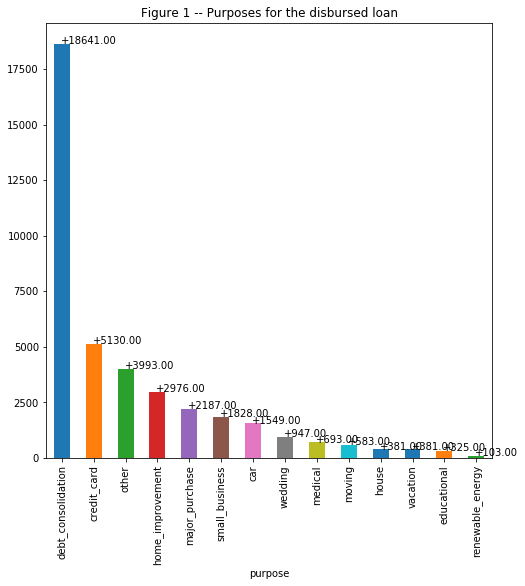

In [25]:
### Check the Most favoured loan purpose and the default rate| Start
df_purpose = df.groupby('purpose').id.count().to_frame()
df_purpose.rename(columns={'id':'Count'},inplace=True)
df_purpose=df_purpose.sort_values('Count',ascending=False)
ax=df_purpose['Count'].plot.bar(figsize=(8,8))
plt.title('Figure 1 -- Purposes for the disbursed loan')
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))


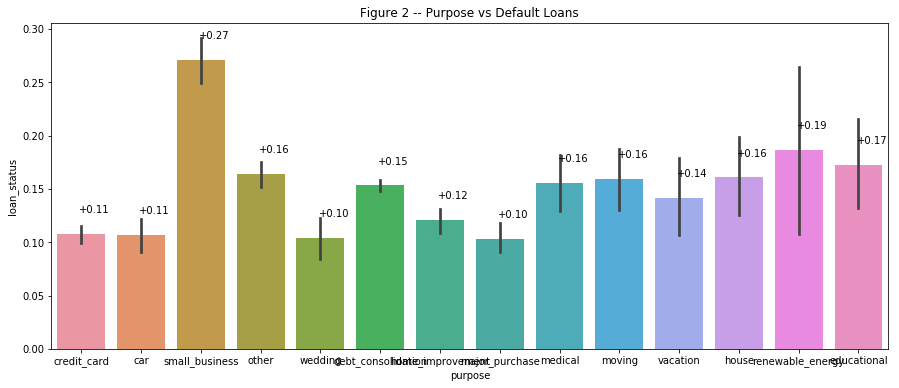

In [26]:
plotbar('purpose','Figure 2 -- Purpose vs Default Loans')
    
### Check the Most favoured loan purpose and the default rate | End

<center>The pupose "debt_consolidation" is a clear winner in the loan data set, but if we check the defaulted loans the Small Business , Renewable Energy, Education and Moving

Text(0.5,1,'Figure 3 -- Home Ownerships for the disbursed loans')

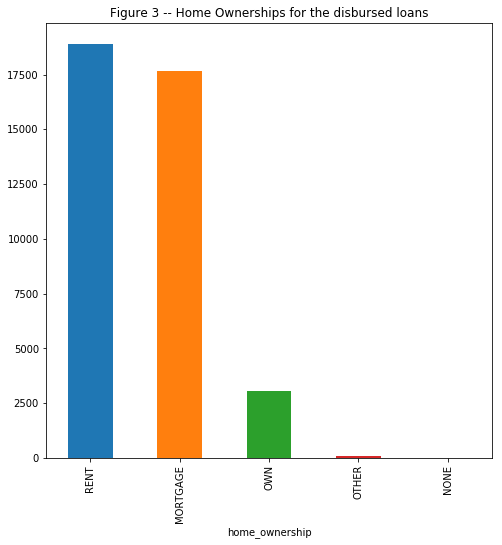

In [27]:
### Check the Home ownership and the loan default rate | Start
df_purpose = df.home_ownership.dropna().reset_index().groupby('home_ownership').index.count().reset_index()
df_purpose.rename(columns={'index':'Count'},inplace=True)
df_purpose=df_purpose.sort_values('Count',ascending=False)
df_purpose = df_purpose.set_index('home_ownership')
ax=df_purpose['Count'].plot.bar(figsize=(8,8))
plt.title('Figure 3 -- Home Ownerships for the disbursed loans')


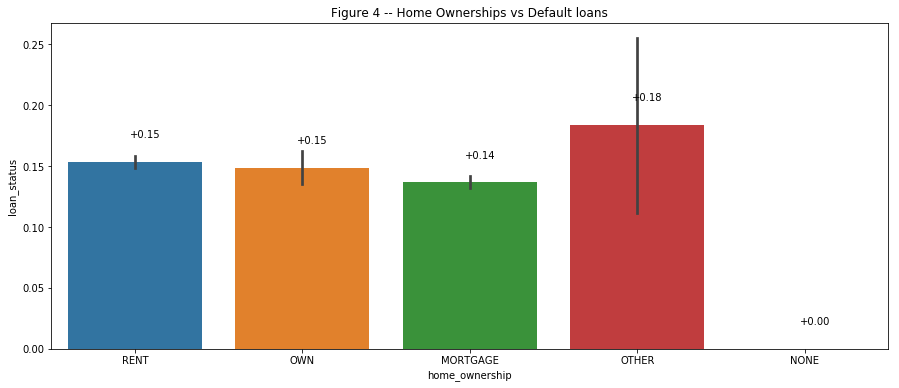

In [28]:
plotbar('home_ownership','Figure 4 -- Home Ownerships vs Default loans')
### Check the Home ownership and the loan default rate | End

<center>Mostly the borrowers are on rented house or on mortgaged house, but if checked on the defaulted loans, home ownership doesnt give us much

Text(0.5,1,'Figure 5 -- State where the loans were disbursed')

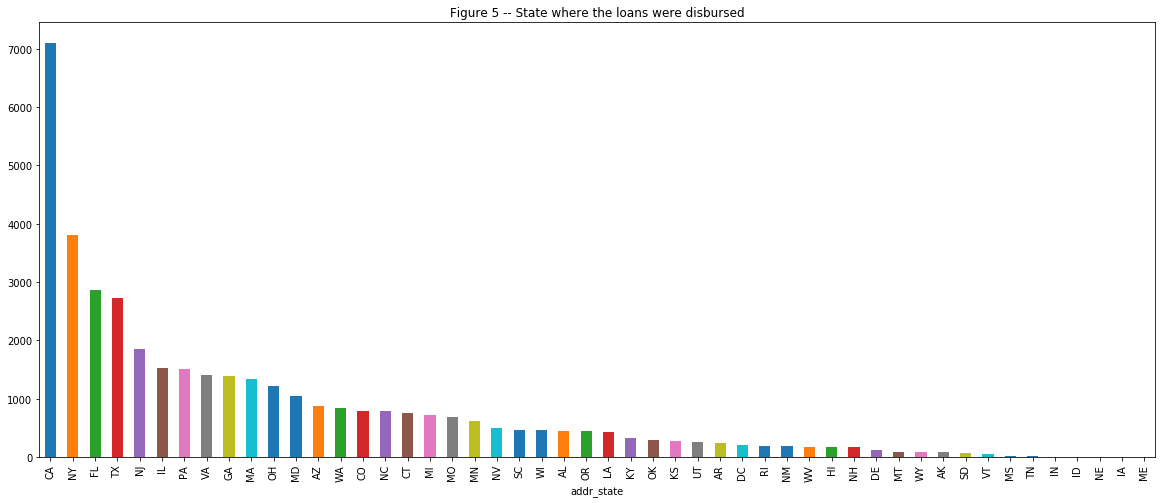

In [29]:
### Check the State of the borrowers and the loan default rate   | Start
df_state=df.groupby('addr_state').id.count().reset_index().rename(columns={'id':'Count'})
df_state=df_state.sort_values('Count',ascending=False).set_index('addr_state')
ax=df_state['Count'].plot.bar(figsize=(20,8))
plt.title('Figure 5 -- State where the loans were disbursed')


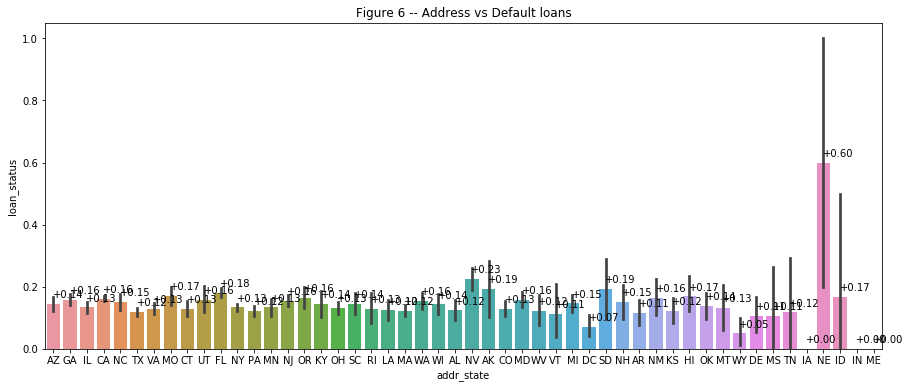

In [30]:
plotbar('addr_state','Figure 6 -- Address vs Default loans')
### Check the State of the borrowers and the loan default rate  | End

<center>Maximum number of borrowers were from California and New York, but mostly the defaulters are from Nebraska

[]

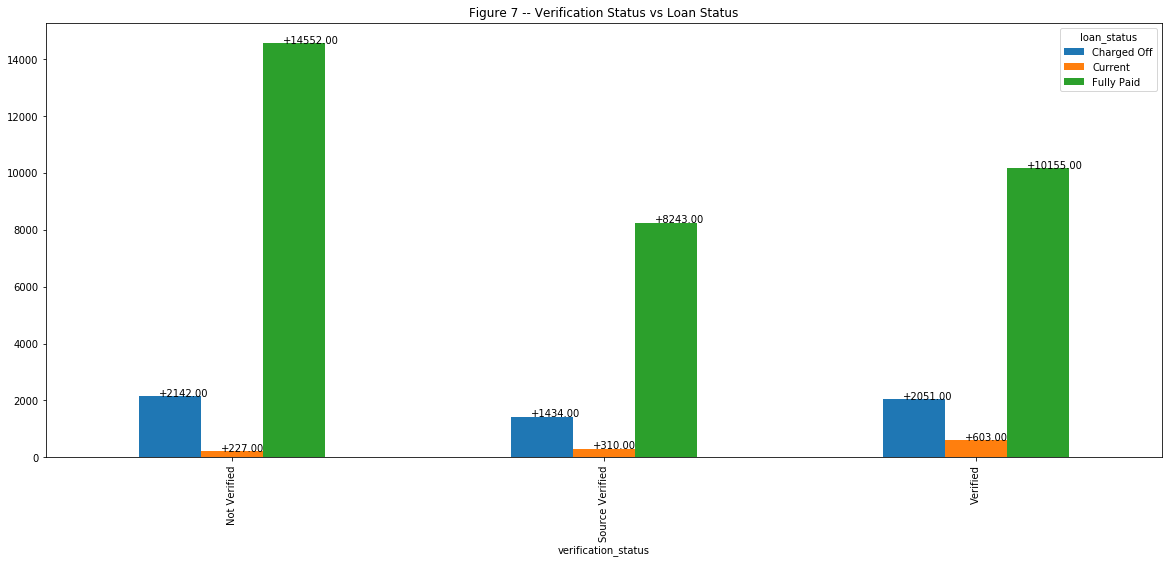

In [31]:
### Check the Verification status and the loan status of the borrowers | Start
df['verification_status'].value_counts(normalize=True)
fig,ax=plt.subplots()
df_vs = df.groupby('loan_status')['verification_status'].value_counts(ascending=False)\
                            .unstack(level=0).reset_index()
df_vs.set_index('verification_status',inplace=True)
df_vs.plot.bar(ax=ax,figsize=(20,8))

x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.title('Figure 7 -- Verification Status vs Loan Status')
plt.plot()


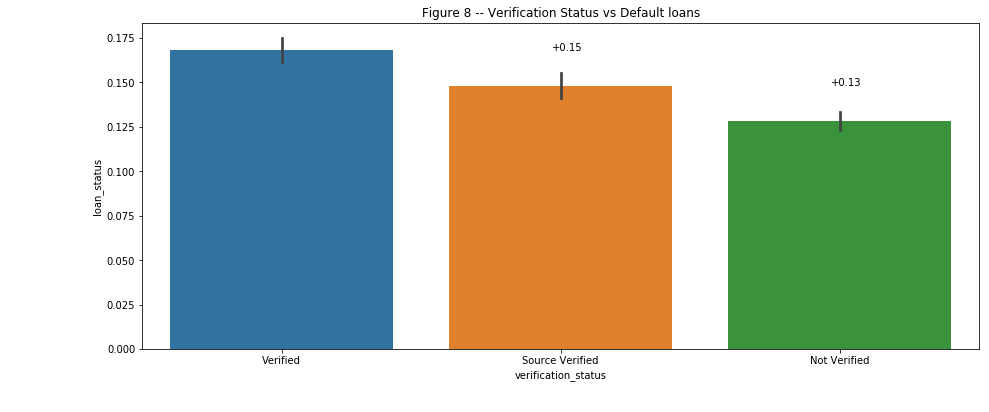

In [32]:
plotbar('verification_status','Figure 8 -- Verification Status vs Default loans')

### Check the Verification status,loan status of the borrowers and the loan default rate| End

<center><b> From Figure 7 and 8 and 8a </b>,Its a point to note that most number of the <u>Charged Off</u> Loans are <b> NOT VERIFIED </b>, but if we see further a suprising result comes out the most defaulters are present within the verified applicants.

<center>***** Ananlysis on Ordered variable ***** | Start

Text(0.5,1,'Figure 9 -- Loan Status Count')

<Figure size 432x288 with 0 Axes>

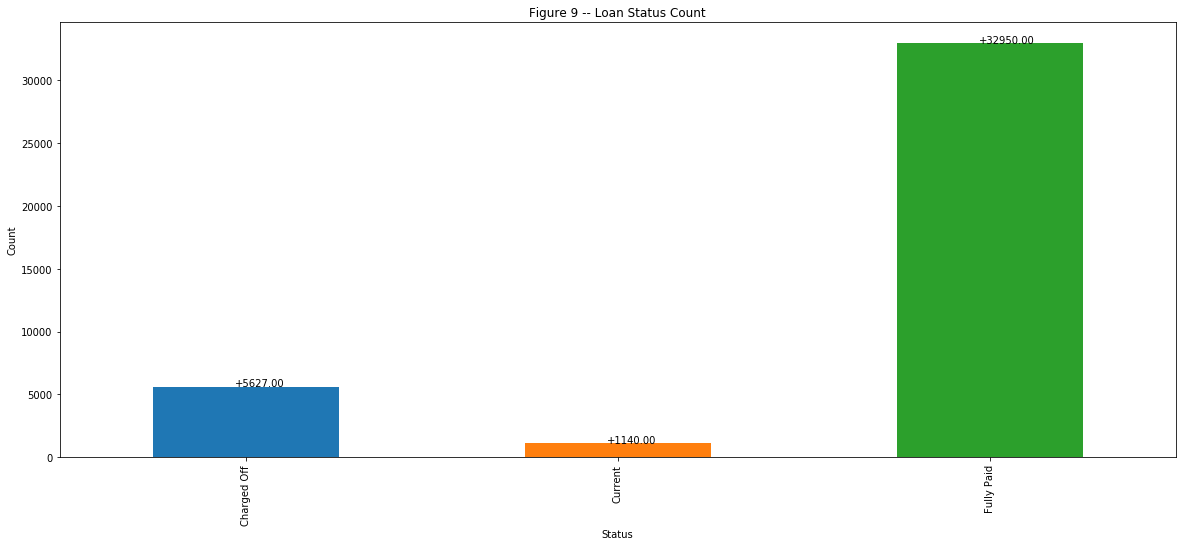

In [33]:
### Check the loan status of the borrowers   | Start
df_loanstat=df.groupby('loan_status').id.count()
df_loanstat.rename(columns={'id':'Count'},inplace=True)
plt.figure(1)
fig,ax=plt.subplots()
df_loanstat.plot.bar(figsize=(20,8))
plt.title('Loan Status')
plt.ylabel('Count')
plt.xlabel('Status')
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.plot()
plt.title('Figure 9 -- Loan Status Count')
### Check the loan status of the borrowers | End

<center>From the above loan status , mostly are fully paid, i.e. for 29719 loans, Charged Off is:5223.

Text(0.5,1,'Figure 10 -- Loan disbursed each year')

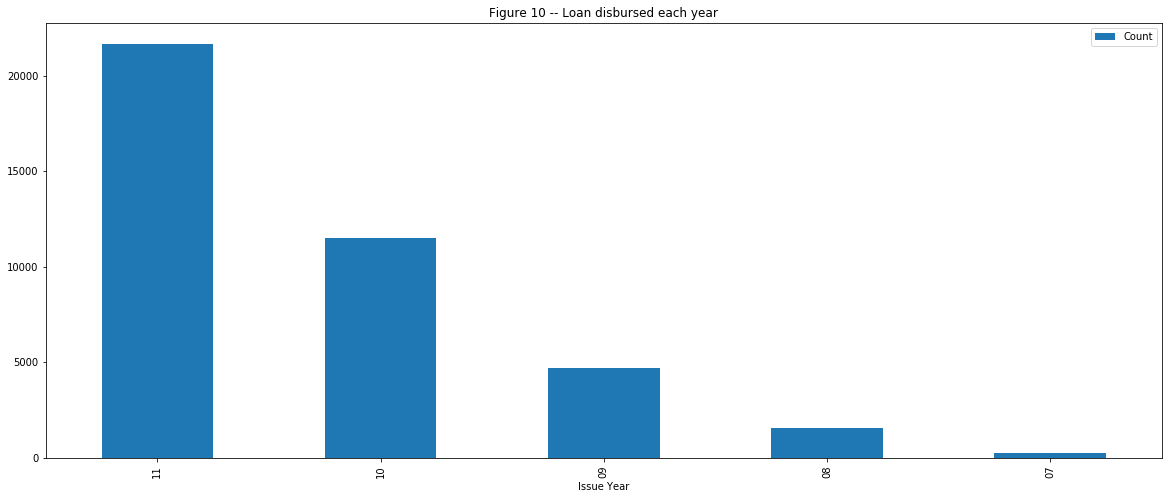

In [34]:
## ***** Check the loan issue year and the loan default rate  | Start **********

df_year=df.groupby('Issue Year').id.count().reset_index().rename(columns={'id':'Count'})\
.sort_values(by='Count',ascending=False).set_index('Issue Year')

fig,ax=plt.subplots()
df_year.plot.bar(ax=ax,figsize=(20,8))
plt.plot()
plt.title('Figure 10 -- Loan disbursed each year')


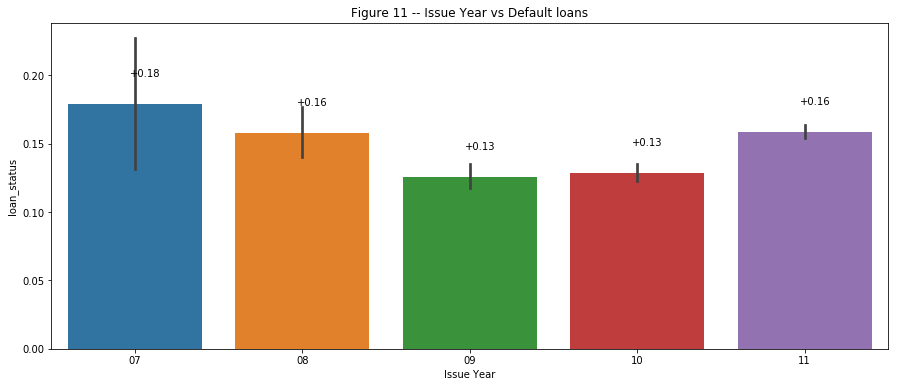

In [35]:
plotbar('Issue Year','Figure 11 -- Issue Year vs Default loans')
## ***** Check the loan issue year  and the loan default rate| End **********

 <center> <b> From Figure 10 and 11 </b>, 2011 was the year when maximum loans were disbursed and there is a increase of loan disbursed on YoY basis, but 2011 comes second in the defaulted loans next to 2007

<function matplotlib.pyplot.plot(*args, **kwargs)>

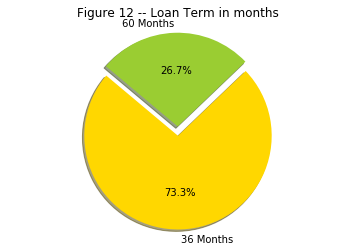

In [36]:
## ***** Check the Loan term and the loan default rate | Start **********
labels = ['36 Months','60 Months']
sizes = [df[(df.term=='36') & ((df.loan_status=='Charged Off') | (df.loan_status=='Fully Paid'))].id.count(),df[df.term=='60'].id.count()]
colors = ['gold', 'yellowgreen']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140,explode=[0,0.1])
plt.axis('equal')
plt.title('Figure 12 -- Loan Term in months')
plt.plot

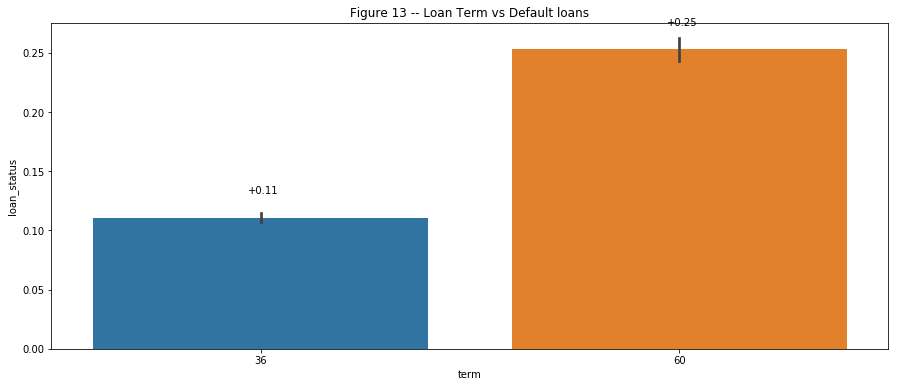

In [37]:
plotbar('term','Figure 13 -- Loan Term vs Default loans')
## ***** Check the Loan term and the loan default rate| End **********

<center> <b> From Figure 12 and 13 </b>, Most of the borrowers took loan for 36 months (over 73%), but the deaulters are mostly in the loan term of <b> 60 months </b>

Text(0.5,1,'Figure 14 -- Borrower grades')

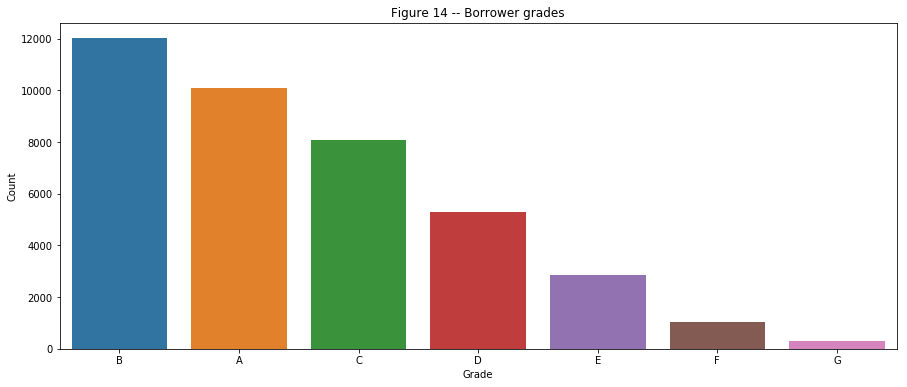

In [38]:
## ****** Checking the Grades and the loan default rate ******** | Start
plt.figure(figsize=(15,6))
fig = sns.countplot(df.grade.dropna(),order = df[(df.loan_status=='Charged Off') | (df.loan_status=='Fully Paid')].grade.value_counts().index)
fig.set(xlabel='Grade',ylabel='Count')
plt.title('Figure 14 -- Borrower grades')


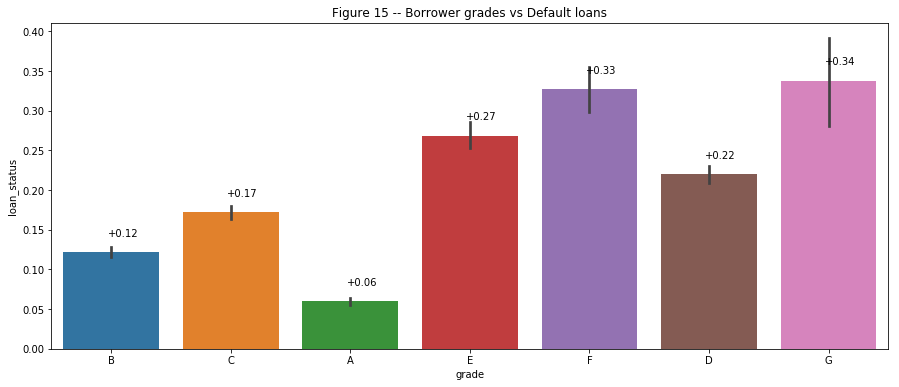

In [39]:
plotbar('grade','Figure 15 -- Borrower grades vs Default loans')

## ***** Check the Borrower grades and the loan default rate| End **********

<center>  <b> From Figure 14 and 15 </b>, Most of the borrower grades lies between B,A and C, but the deafulters are mostly from Grade G, F, E

Text(0.5,1,'Figure 16 -- Borrower sub grades')

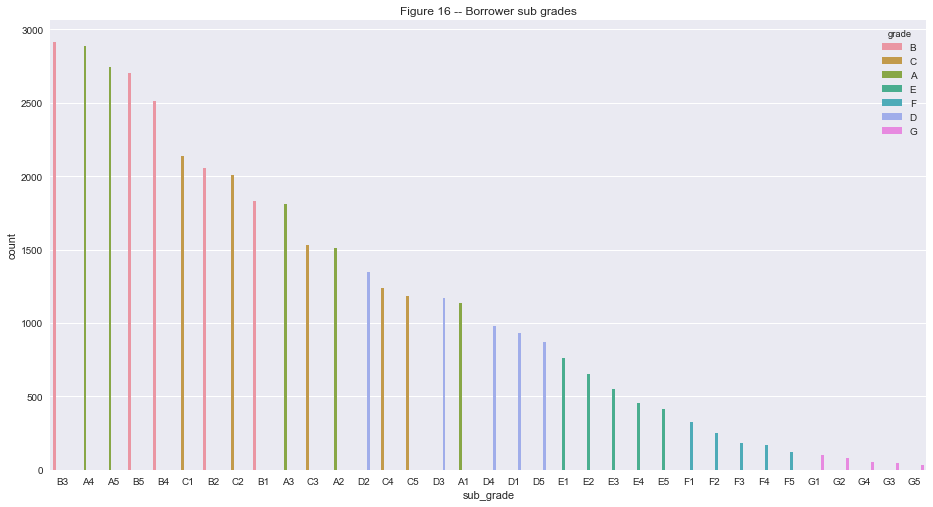

In [40]:
## ***** Check the Borrower sub grades and the loan default rate| Start **********
sns.set(style="darkgrid")
fig,ax=plt.subplots()
fig.set_size_inches(15.7,8.27)
sns.countplot(x="sub_grade", hue="grade", data=df,order=df.sub_grade.value_counts().index,ax=ax)
plt.title('Figure 16 -- Borrower sub grades')

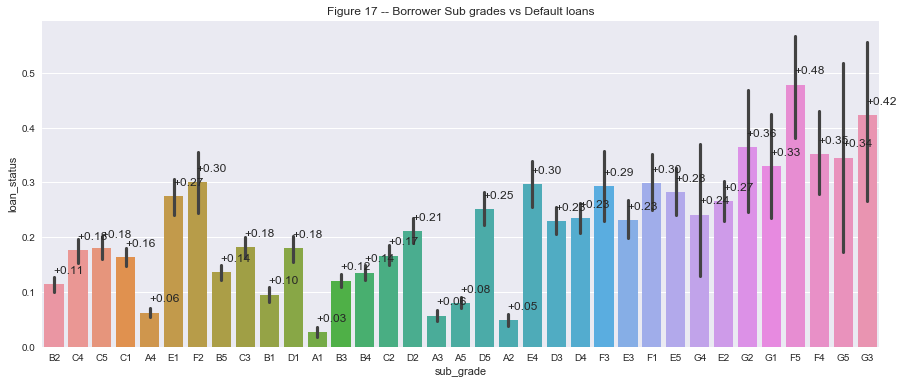

In [41]:
plotbar('sub_grade','Figure 17 -- Borrower Sub grades vs Default loans')

## ***** Check the Borrower sub grades and the loan default rate| End **********

 <Center> <b> From Figure 16 and 17 </b>,if we further divide the grades into sub-grades , 
we observe that the borrowers are distributed in B3,A4,A5,B5,B4,C1,B2. But again the deafulters are mostly from F5, G3, G2..

<center>***** Ananlysis on Ordered variable ***** | End

<center>Analysis on Quantitative Variables | Start

Text(0.5,1,'Figure 18 -- Borrower incomes -- before outlier removal')

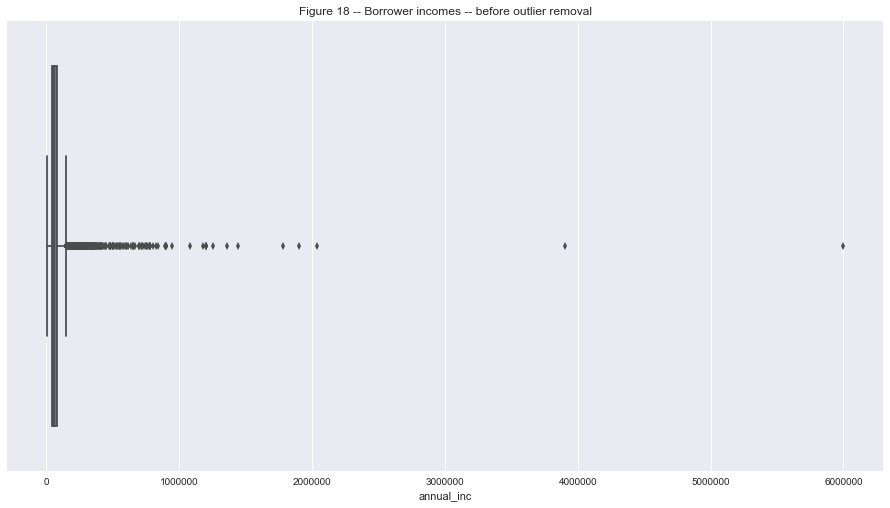

In [42]:
## ******* Check the annual income | Start
sns.set(style="darkgrid")
fig,ax=plt.subplots()
fig.set_size_inches(15.7,8.27)
sns.boxplot(df['annual_inc'])
plt.title('Figure 18 -- Borrower incomes -- before outlier removal')

In [43]:
df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<center>from the above plot and the table we can see there is an outlier which can be removed. 60000000 (max) , mean 68969. the outlier is required to be removed

In [44]:
df_95=df['annual_inc'].quantile(0.955)
df=df[df.annual_inc<df_95]
df.annual_inc.describe()

count     37926.000000
mean      61478.122765
std       28370.432694
min        4000.000000
25%       40000.000000
50%       56400.000000
75%       78000.000000
max      149981.000000
Name: annual_inc, dtype: float64

Text(0.5,1,'Figure 19 -- Borrower incomes -- after outlier removal')

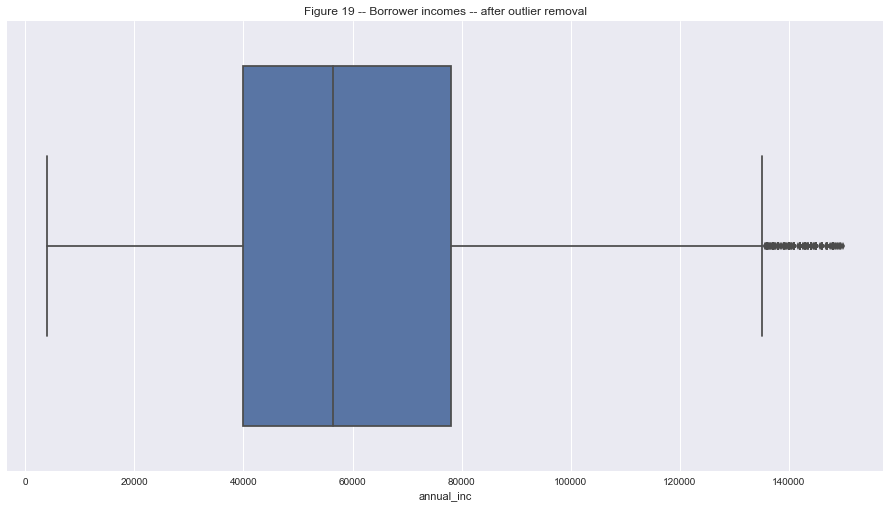

In [45]:
sns.set(style="darkgrid")
fig,ax=plt.subplots()
fig.set_size_inches(15.7,8.27)
sns.boxplot(df['annual_inc'])
plt.title('Figure 19 -- Borrower incomes -- after outlier removal')
## ******* Check the annual income | End

In [46]:
##** We can bin the annual incomes to check if there is any pattern on the same | Start ***
def incbinning(inc):
    if inc<40000:
        return 'low'
    elif inc>=40000 and inc<=78000: ## based on the range from 1st to 3rd quartile
        return 'medium'
    else:
        return 'high'
    
df_loan['inc_state'] = df_loan['annual_inc'].apply(lambda x: incbinning(x))

df_loan['inc_state'].value_counts()


medium    18889
high      10845
low        8843
Name: inc_state, dtype: int64

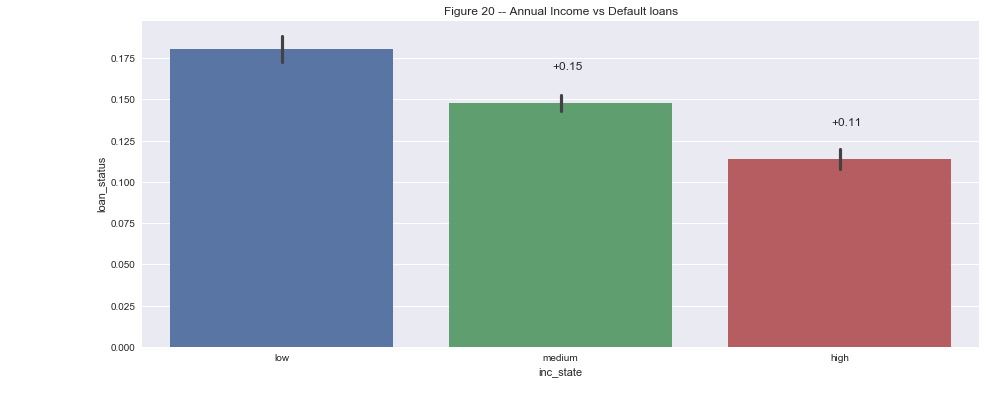

In [47]:
plotbar('inc_state','Figure 20 -- Annual Income vs Default loans')
##** We can bin the annual incomes to check if there is any pattern on the same | End ***

<Center><b>From Figure 18,19,20</b> The majority of the borrower lies between 40000 USD to 75000 USD, but mostly the borrowers with Low Incomes range (less than 40000 USD) are defaulters followed by the medium income range (between 40000 and 78000 USD)

Text(0.5,1,'Figure 21 -- Borrower Loan Amounts')

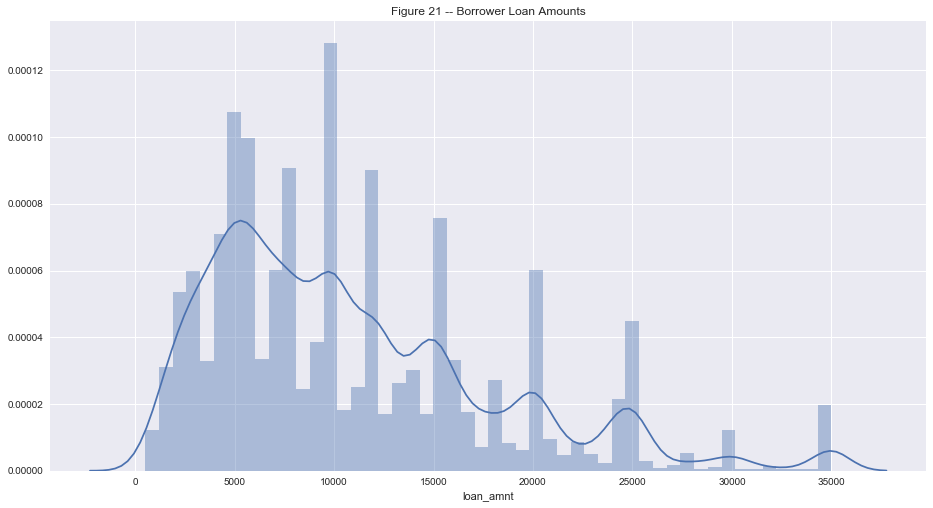

In [48]:
# ********* Check the loan amount ********* | Start
sns.set(style="darkgrid")
fig,ax=plt.subplots()
fig.set_size_inches(15.7,8.27)
sns.distplot(df.loan_amnt)
plt.title('Figure 21 -- Borrower Loan Amounts')

In [49]:
##** We can bin the loan to check if there is any pattern on the same | Start ***
def loanbinning(loan):
    if loan<5100:
        return 'low'
    elif loan>=5100 and loan<=15000:
        return 'medium'
    else:
        return 'high'
    
df_loan['loan_state'] = df_loan['loan_amnt'].apply(lambda x: loanbinning(x))

df_loan['loan_state'].value_counts()

medium    20465
low        9492
high       8620
Name: loan_state, dtype: int64

In [50]:
df.loan_amnt.describe()
# ********* Check the loan amount ********* | End

count    37926.000000
mean     10875.576122
std       7181.527368
min        500.000000
25%       5100.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

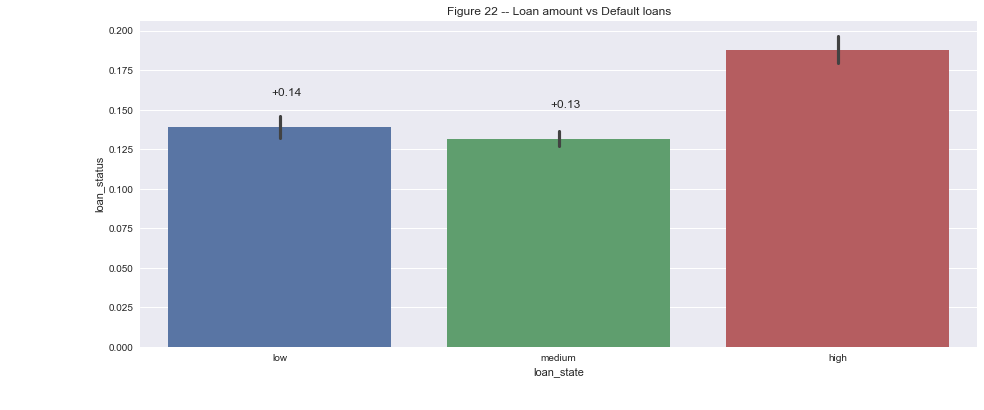

In [51]:
plotbar('loan_state','Figure 22 -- Loan amount vs Default loans')
##** We can bin the annual incomes to check if there is any pattern on the same | End ***

<center><b>From Figure 21 and 22, </b>mostly the loan amount lies between 5000 USD to 15000 USD (approx), but on further checking we can see that the most of the defaults happen for <b>High Loan amount</b>

In [52]:
##** We can bin the installment to check if there is any pattern on the same | Start ***
def instbinning(inst):
    if inst<165:
        return 'low'
    elif inst>=165 and inst<=277:
        return 'medium'
    elif inst>277 and inst<=425:
        return 'high'
    else:
        return 'very high'
    
df_loan['inst_state'] = df_loan['installment'].apply(lambda x: instbinning(x))

df_loan['inst_state'].value_counts()
df_loan['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [53]:
df_loan['inst_state'].value_counts()

high         9683
medium       9680
very high    9660
low          9554
Name: inst_state, dtype: int64

In [54]:
df_loan['Experience'].describe()

count    37544.000000
mean         5.061048
std          3.401750
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: Experience, dtype: float64

In [55]:
##** We can bin the Experience to check if there is any pattern on the same | Start ***
def expexp(yrs):
    if yrs<2:
        return 'Rookie'
    elif yrs>=2 and yrs<=4:
        return 'Junior'
    elif yrs>4 and yrs<=9:
        return 'Experienced'
    else:
        return 'Expert'
    
df_loan['emp_exp'] = df_loan['Experience'].apply(lambda x: expexp(x))

df_loan['emp_exp'].value_counts()


Junior         11645
Experienced     9734
Expert          9521
Rookie          7677
Name: emp_exp, dtype: int64

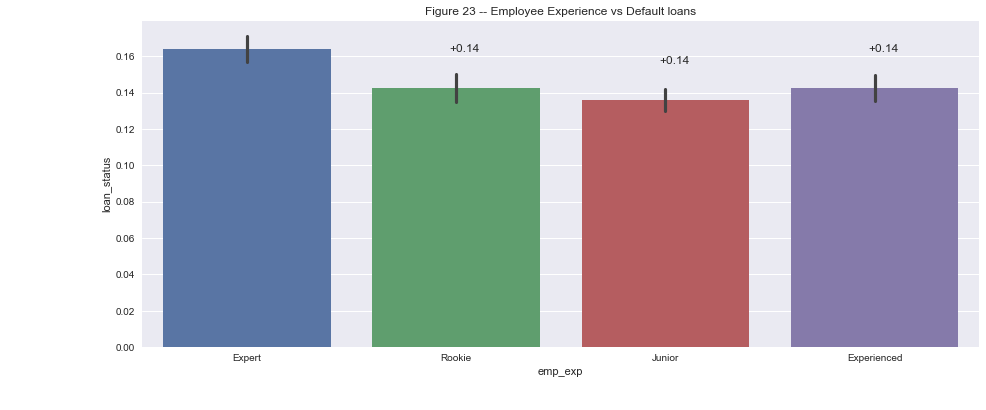

In [56]:
plotbar('emp_exp','Figure 23 -- Employee Experience vs Default loans')

<center> <b> From the figure 23</b>, we can see mostly the Experienced and Expert i.e. those employees having experience > 4 years are having high chances of defaulting the loans.

In [57]:
df_loan['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [58]:
##** We can bin the dti to check if there is any pattern on the same | Start ***
def dtistatus(dti):
    if dti<8:
        return 'Low'
    elif dti>=8 and dti<=13:
        return 'Medium'
    elif dti>13 and dti<=18.5:
        return 'High'
    else:
        return 'Very High'
    
df_loan['dti_status'] = df_loan['dti'].apply(lambda x: dtistatus(x))

df_loan['dti_status'].value_counts()



High         10261
Very High     9722
Low           9411
Medium        9183
Name: dti_status, dtype: int64

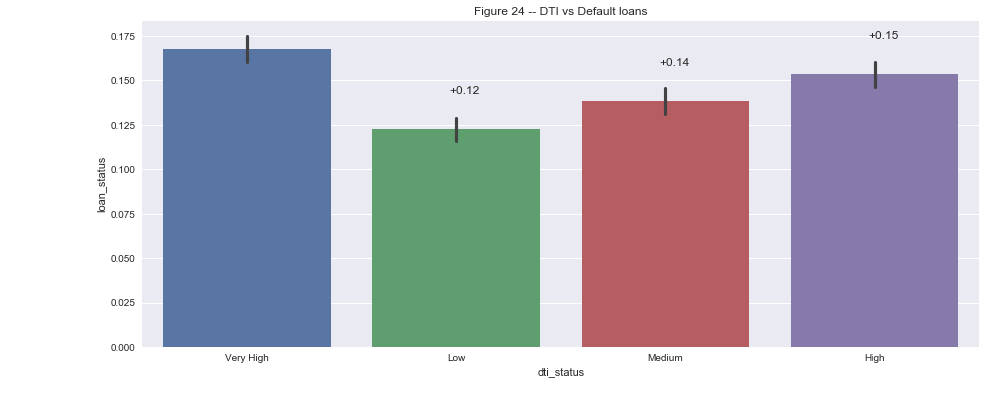

In [59]:
plotbar('dti_status','Figure 24 -- DTI vs Default loans')
##** We can bin the dti to check if there is any pattern on the same | End ***

<center> <b> From the figure 24</b>, there is a direct relation between dti and default loans, as it increases the default of loans also increases

In [60]:
df_loan['Interest Rate']=df_loan['Interest Rate'].astype('float')
##** We can bin the interest to check if there is any pattern on the same | Start ***
def interest(int_rate):
    if int_rate<9:
        return 'Low'
    elif int_rate>=9 and int_rate<=12:
        return 'Medium'
    elif int_rate>13 and int_rate<=15:
        return 'High'
    else:
        return 'Very High'
    
df_loan['int_status'] = df_loan['Interest Rate'].apply(lambda x: interest(round(x)))

df_loan['int_status'].value_counts()


Medium       12959
Very High    11500
Low           8737
High          5381
Name: int_status, dtype: int64

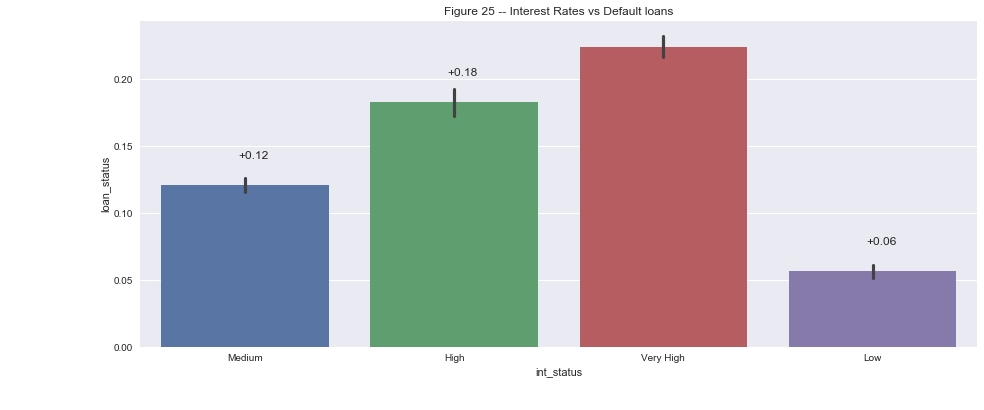

In [61]:
df_loan['Interest Rate'].describe()
plotbar('int_status','Figure 25 -- Interest Rates vs Default loans')

##** We can bin the interest to check if there is any pattern on the same | End ***

<center> <b> From the figure 25</b>, there is a direct relation between interest rate and loan defaults, very high interest rate has a high chance of loan defaults

<Center> <b><u>Observations after Univariate analysis</u></b>

1. Debt Consolidation is the purpose for which maximum loans were taken but if we check the defaulted loans the Small Business , Renewable Energy, Education and Moving are the sectors where the loan deffaults are compartively more.
2. Mostly the borrowers are on rented house or on mortgaged house but if checked on the defaulted loans, home ownership doesnt give us much inputs.
3. California and New York are the 2 states from where maximium numbers of loans are from but mostly the defaulters are from Nebraska.
4. Maximum number of Charged Off loans falls under Not Verified category (in total 2142) out of 5627 total charged off loans but if we see further a suprising result comes out the most defaulters are present within the verified applicants.
5. 2011 was the year when maximum loans were disbursed and there is a increase of loan disbursed on YoY basis, but 2011 comes second in the defaulted loans next to 2007
6. Most of the borrowers took loan for 36 months (over 73%), but the deaulters are mostly in the loan term of 60 months
7. Most of the borrower grades lies between B,A and C, but the deafulters are mostly from Grade G, F, E, if we further divide the grades into sub-grades , we observe that the borrowers are distributed in B3,A4,A5,B5,B4,C1,B2. But again the deafulters are mostly from F5, G3, G2..
8. The majority of the borrower lies between 40000 USD to 75000 USD, but mostly the borrowers with Low Incomes range (<40000 USD) are defaulters followed by the medium income range (between 40000 and 78000 USD)
9. Majority of the loan amount lies between 5000 USD to 15000 USD (approx), but on further checking we can see that the most of the defaults happen for High Loan amount.
10. The Experienced and Expert i.e. those employees having experience > 4 years are having high chances of defaulting the loans.
11. There is a direct relation between dti and default loans, as it increases the default of loans also increases.
12. There is a direct relation between interest rate and loan defaults, very high interest rate has a high chance of loan defaults

<Center><b>Univariate Analysis | End<b>

<Center><b>Bivariate Analysis | Start<b>

In [62]:
## Removing the Categorical variable before checking the correlation | Start 
df_catg_var=df.drop(['id', 'member_id', 'term', 'grade', 'sub_grade',
        'home_ownership', 'verification_status', 'issue_d', 'purpose',  'addr_state',
       'earliest_cr_line', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_credit_pull_d'],1)

In [63]:
df_catg_var.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_rec_prncp,total_rec_int,last_pymnt_amnt,Experience
loan_amnt,1.000000,0.981783,0.939034,0.929601,0.404043,0.093438,-0.036739,0.000138,0.021429,0.166865,-0.046838,0.314888,0.240302,0.846159,0.728658,0.444732,0.155556
funded_amnt,0.981783,1.000000,0.957106,0.955352,0.399688,0.092876,-0.036781,0.000567,0.022191,0.164898,-0.047921,0.307247,0.234981,0.863891,0.736797,0.449509,0.155110
funded_amnt_inv,0.939034,0.957106,1.000000,0.902471,0.382939,0.100660,-0.043086,-0.013882,0.077122,0.152474,-0.049491,0.288716,0.227472,0.839151,0.729318,0.439535,0.166219
installment,0.929601,0.955352,0.902471,1.000000,0.400114,0.080473,-0.024569,0.000846,0.007156,0.161609,-0.042377,0.306919,0.214212,0.845017,0.633563,0.396776,0.124089
annual_inc,0.404043,0.399688,0.382939,0.400114,1.000000,-0.075649,0.032341,0.028184,-0.005466,0.263890,-0.013477,0.400259,0.385290,0.385185,0.271934,0.214225,0.192628
dti,0.093438,0.092876,0.100660,0.080473,-0.075649,1.000000,-0.032318,0.006716,0.067075,0.298647,-0.006470,0.270516,0.246431,0.067760,0.125559,0.019784,0.058572
delinq_2yrs,-0.036739,-0.036781,-0.043086,-0.024569,0.032341,-0.032318,1.000000,0.007832,-0.568432,0.014678,0.007400,-0.060344,0.068522,-0.043432,0.018338,-0.014549,0.013064
inq_last_6mths,0.000138,0.000567,-0.013882,0.000846,0.028184,0.006716,0.007832,1.000000,-0.002874,0.089756,0.027441,-0.028108,0.106665,-0.033169,0.017089,0.023019,0.008503
mths_since_last_delinq,0.021429,0.022191,0.077122,0.007156,-0.005466,0.067075,-0.568432,-0.002874,1.000000,0.025211,0.058604,0.025061,0.010245,0.021249,0.006257,0.011168,0.050883
open_acc,0.166865,0.164898,0.152474,0.161609,0.263890,0.298647,0.014678,0.089756,0.025211,1.000000,0.004832,0.286010,0.683596,0.148687,0.112396,0.072534,0.097165


Text(0.5,1,'Figure 26 -- Correlation - Heat Map')

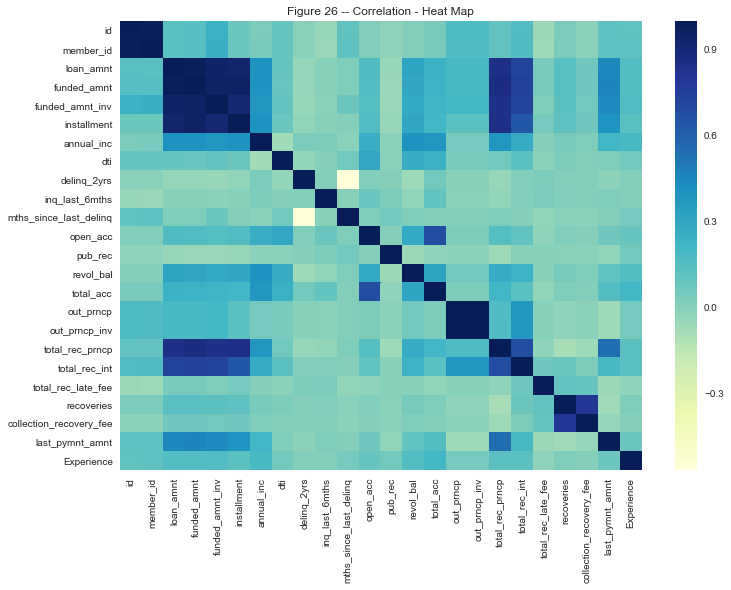

In [64]:
plt.figure(figsize=(11.7,8.27))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title('Figure 26 -- Correlation - Heat Map')

Text(0.5,1,'Figure 27 -- Correlation - Heat Map')

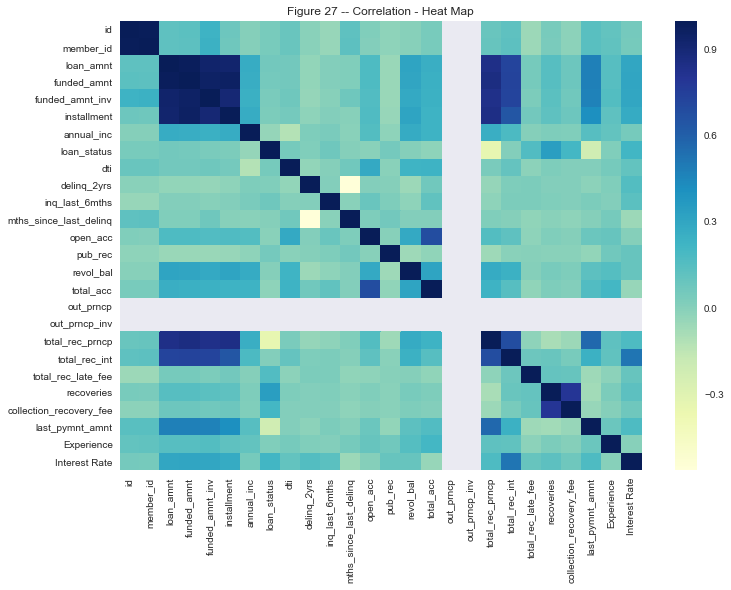

In [65]:
plt.figure(figsize=(11.7,8.27))
sns.heatmap(df_loan.corr(),cmap="YlGnBu")
plt.title('Figure 27 -- Correlation - Heat Map')

[]

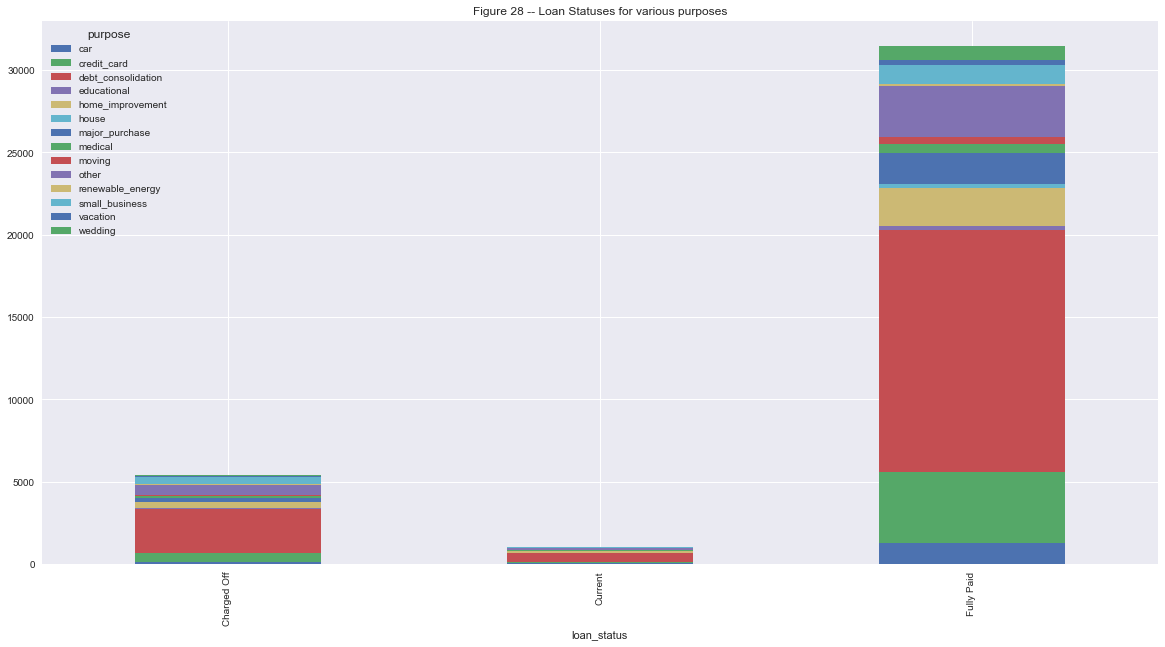

In [66]:
## Analysis on the purpose vs Loan Status
df_lsp = df.groupby(['purpose']).loan_status.value_counts(ascending=False).unstack(level=0).reset_index()
df_lsp.set_index('loan_status',inplace=True)
df_lsp.plot.bar(stacked=True,figsize=(20,10))
plt.title('Figure 28 -- Loan Statuses for various purposes')
plt.plot()

<center>From the Charged off loans most of the loans were taken for debt consolidation

From Figure 2 we know that most of the default happens Small Business , Renewable Energy, Education and Moving, so we can further track down the same accross the loan data

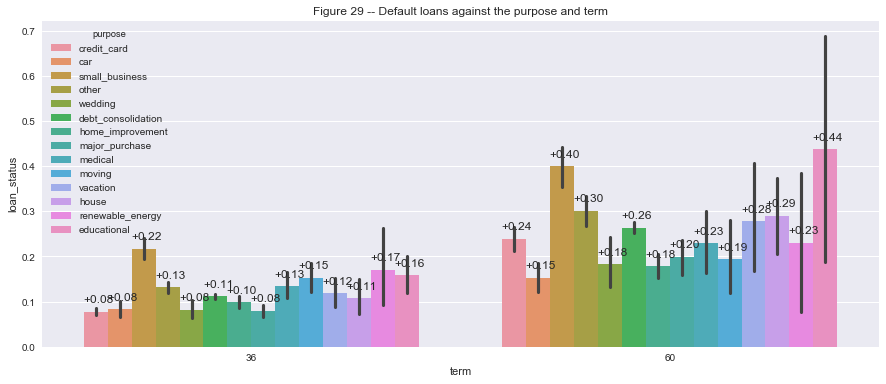

In [67]:
plotsegbar('term','purpose','Figure 29 -- Default loans against the purpose and term')

From Figure 13 we already know that 60 months term has the most number of defaulted loans. 
From the above we can see that <b> Educational loan is the highest on the default loans, 
closely followed by Small Business </b>.

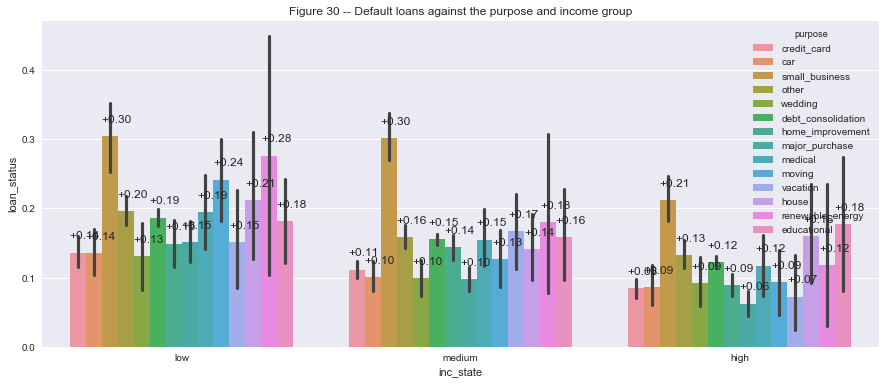

In [68]:
plotsegbar('inc_state','purpose','Figure 30 -- Default loans against the purpose and income group')

<center><b>from Figure 30, </b> we can see that accross all the income groups Small business 
is the one having most number of defaulted loans. But there are some interesting trends</center>
<ul>
<li> For low & mid income group: after Small business next higest default is on Renewable energy</li>
<li> For low income group: Considerable default happens in House, which is can be ranked 3rd</li>
<li> For mid income group: the 3rd highest default happens in vacation</li>
</ul>

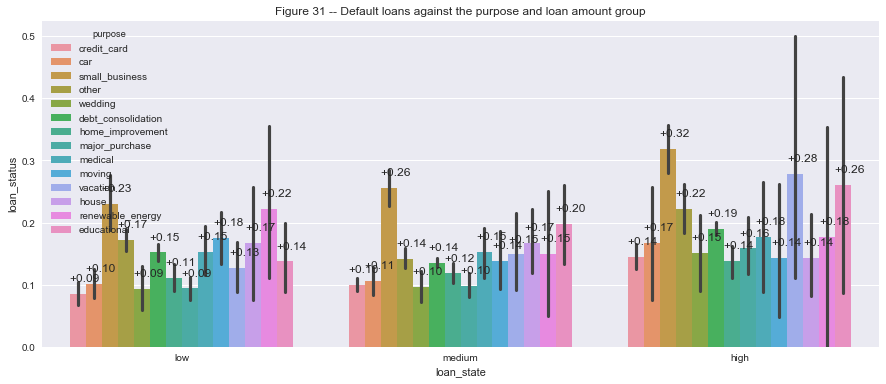

In [69]:
plotsegbar('loan_state','purpose','Figure 31 -- Default loans against the purpose and loan amount group')

<center> <b> From figure 31</b>, we can see below: </center>
<ul>
<li> For low, mid and high loan group: The Small business is having the highest default</li>
<li> For low loan group: 2nd highest default happens for the loans taken for renewable energy</li>
    <li>For medium loans: 2nd highest default happens for education </li>
    <li>For high loans: 2nd highest default happens for vacation </li>
<li> For low loans group: the 3rd highest default happens in moving</li>
    <li> For medium loans group: the 3rd highest default happens in house</li>
    <li> For high loans group: the 3rd highest default happens in education</li>
</ul>  

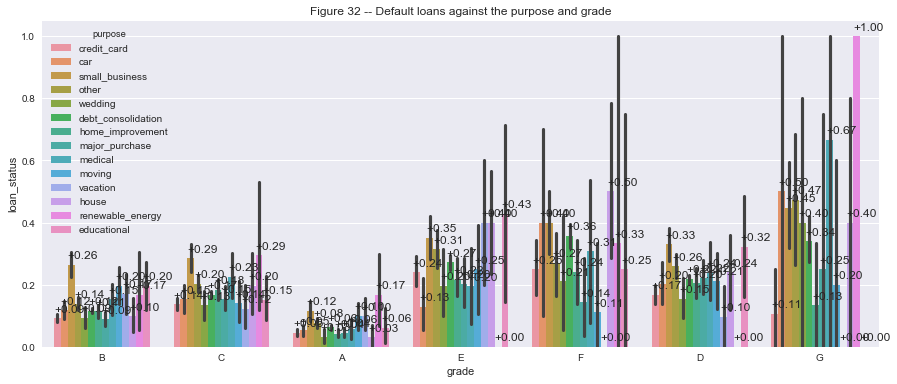

In [70]:
plotsegbar('grade','purpose','Figure 32 -- Default loans against the purpose and grade')

<center> <b> From Figure 32 </b>, we can see that Accross grades G, F and E are highest among other grades of getting defaulted (this we already know from <b> figure 15 </b> above). But what we can see extra that in Grade G, Medical stands out of getting defaulted (2nd highest). Whereas in Grade F its the House which is having highest chance of getting deafulted.

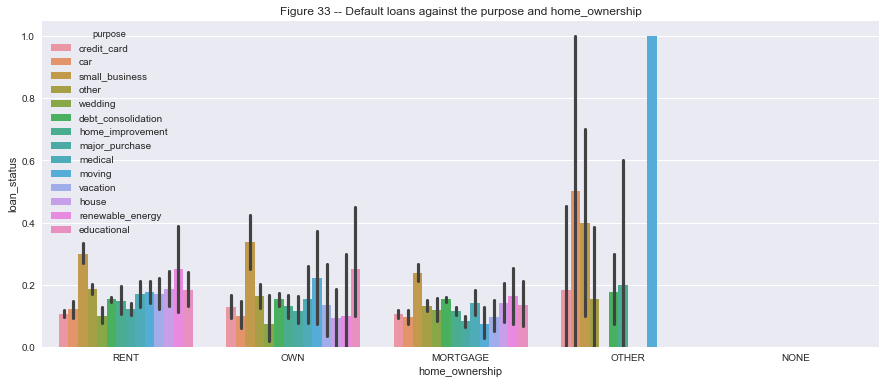

In [71]:
### **** Plot Home Ownership with loan default and purpose ***** | Start
plt.figure(figsize=(15,6))
sns.barplot(x='home_ownership', y='loan_status', hue='purpose', data=df_loan)
plt.title('Figure 33 -- Default loans against the purpose and home_ownership')
plt.show()

<center> <b> From Figure 33 </b>, we can see that Accross Home Ownerships
highest number of defaulted loans happens in Small Business. But in Other we can see Moving has most number of defaults which is highest among the peers

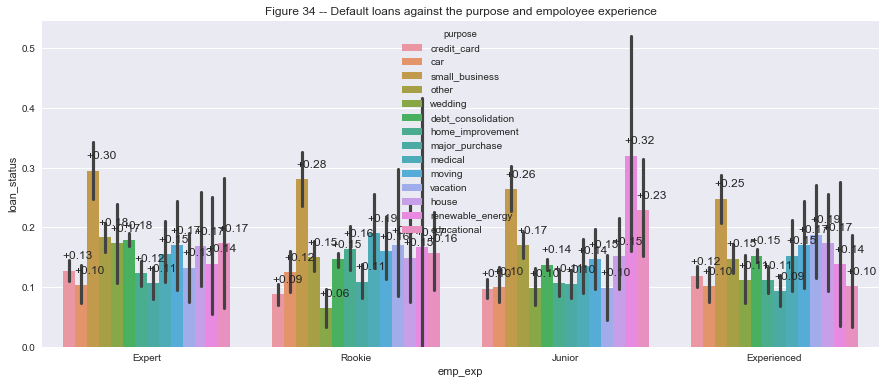

In [72]:
plotsegbar('emp_exp','purpose','Figure 34 -- Default loans against the purpose and empoloyee experience')

<center> <b> From Figure 34 </b>, we can see that Employee Experience
highest number of defaulted loans happens in Small Business (except Junior level). Other high impact loan purposes includes renewable energy,education, house and vacation

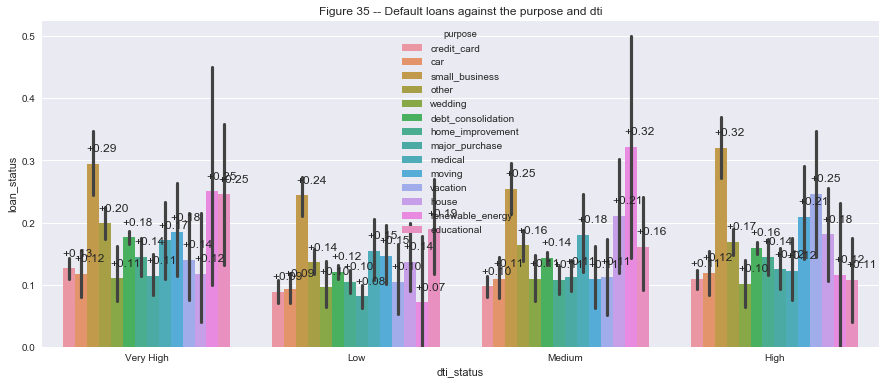

In [73]:
plotsegbar('dti_status','purpose','Figure 35 -- Default loans against the purpose and dti')

<center> <b> From Figure 35 </b>, we can see that for the Very High DTI ratings Small Business, Renewable Enrgy and Education are the risky purposes, whereas for the High DTI Ratings after Small Business, Vacation & Moving is also risky. For the Low DTI ratings Small Business and Education is the risky ones 

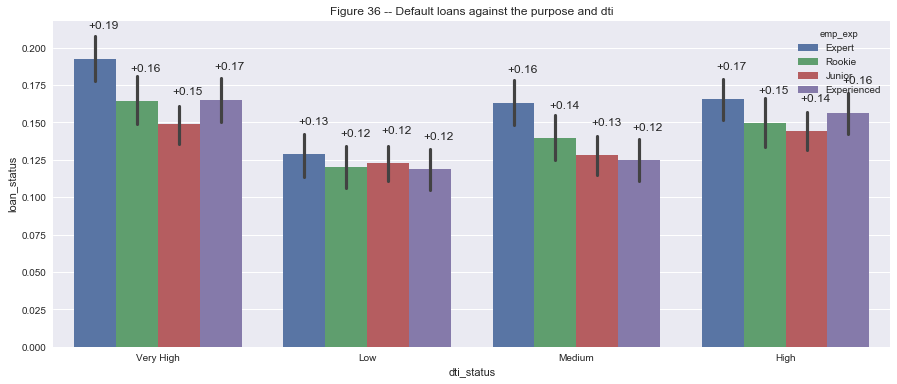

In [74]:
plotsegbar('dti_status','emp_exp','Figure 36 -- Default loans against the purpose and dti')

<center> <b> From Figure 36 </b>, we can deduce that Expert people have highest chances of defaulting in each of Very high, high, medium or Low DTI.

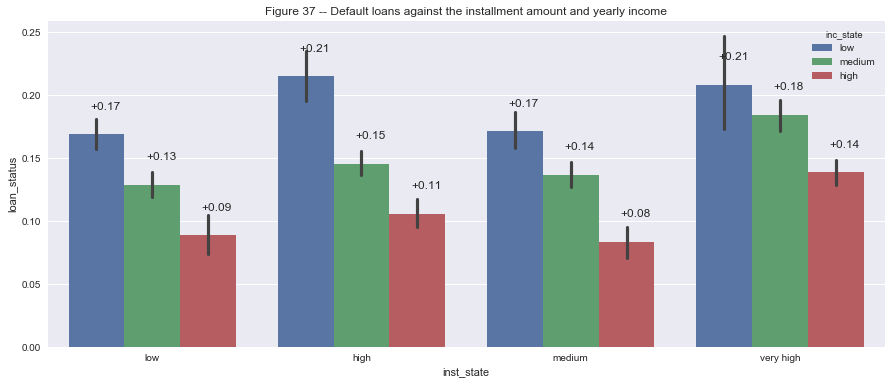

In [75]:
plotsegbar('inst_state','inc_state','Figure 37 -- Default loans against the installment amount and yearly income')

<center> <b> From Figure 37 </b>, For all the installment type (Low, Medium, High and Very High), borrowers with low income has a high chance of getting defaulted. In this case also. Loan amounts categorized as high and very high as the low income group with a highest chance of getting defaulted.

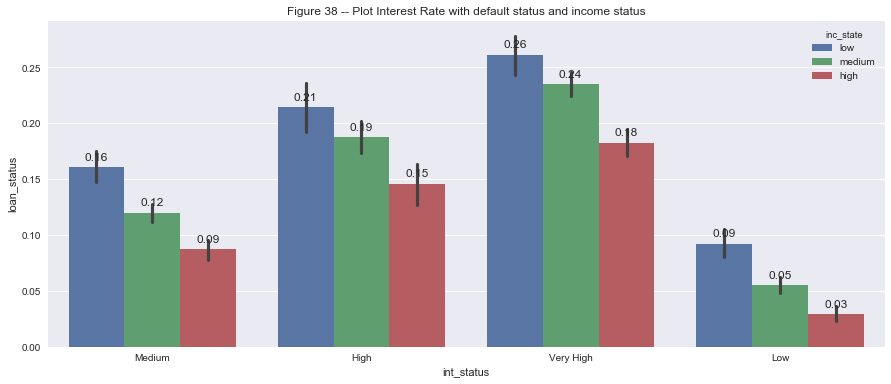

In [76]:
### **** Plot Interest Rate with default status and income status ***** | Start
plt.figure(figsize=(15,6))
s=sns.barplot(x='int_status', y='loan_status', hue='inc_state', data=df_loan)
for p in s.patches:
                    s.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.title('Figure 38 -- Plot Interest Rate with default status and income status')
plt.show()




<center> <b> From Figure 38 </b>, The above graph shows that default rate is high for low income group all through, but it is highest when the interest rate is high and the income is low.

Text(0.5,1,'Figure 38a -- Plot Interest Rate with default status and income status')

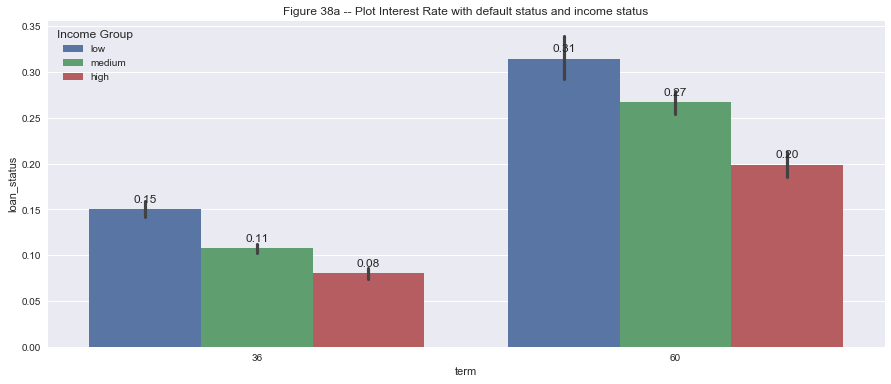

In [77]:
#segmented analysis
# For Each income group term vs Dafault loans
plt.figure(figsize=(15,6))
s= sns.barplot(x = "term", y="loan_status", hue="inc_state", data = df_loan)
plt.legend(title='Income Group', loc='upper left')
for p in s.patches:
                    s.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Figure 38a -- Plot Interest Rate with default status and income status')

<center> <b> From Figure 38a </b>, The above graph shows that default rate is high for low income group all through, but it is highest when the term is 60 months.

In [78]:
df_catg_var_charged_off=df_catg_var.loc[df_catg_var['loan_status']=='Charged Off']

df_catg_var_charged_off=df_catg_var_charged_off.drop(['loan_status', 'Issue Month','zip_code'],1)

df_catg_var_charged_off.isnull().sum()
#correlation between experience and loan amount for charged off loan applicants
df_catg_var_charged_off['Experience'].corr(df_catg_var_charged_off['loan_amnt'])
#Indicates a positive co-relation. So more the experience, chances of the more for applying for higher loan amount

0.19558092811268743

In [79]:
df_catg_var_charged_off_by_exp = df_catg_var_charged_off.groupby('Experience').mean()[['loan_amnt']]
df_catg_var_charged_off_by_exp

,loan_amnt
Experience,
1.0,10193.054256
2.0,10474.635036
3.0,11114.618250
4.0,11195.842697
5.0,11878.798186
6.0,12465.404040
7.0,12334.821429
8.0,12819.329897
9.0,12735.099338


11955.186896122817


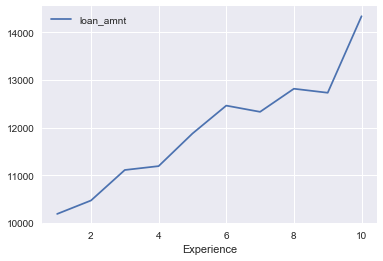

In [80]:
#print(df_catg_var_charged_off_by_exp.Experience.unique())
print(df_catg_var_charged_off_by_exp.loan_amnt.mean())
df_catg_var_charged_off_by_exp.plot.line()

<center> <b> Figure 39 </b>, From all the charged off loan applicants, loan amount is higher for those having high experience

In [81]:
df_catg_var_charged_off_by_exp_vs_dti = df_catg_var_charged_off.groupby('Experience').mean()[['dti']]
df_catg_var_charged_off_by_exp_vs_dti

,dti
Experience,
1.0,13.486754
2.0,13.665712
3.0,13.909758
4.0,13.546944
5.0,14.389660
6.0,14.398754
7.0,14.941548
8.0,14.991649
9.0,14.232119


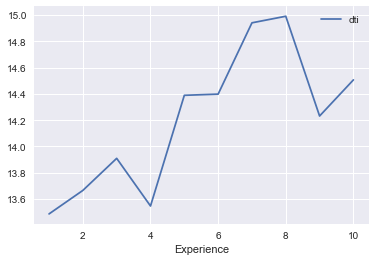

In [82]:
df_catg_var_charged_off_by_exp_vs_dti.plot.line()

<center> <b> Figure 40 </b>, From all the charged off loan applicants, applicants with 7 & 8 years of experience are having more dti 

In [83]:
df_charged_off=df.loc[df['loan_status']=='Charged Off']
df_charged_off.shape

(5438, 43)

In [84]:
df_charged_off_grade = df_charged_off.groupby('grade').mean()[['loan_amnt']]
df_charged_off_grade

,loan_amnt
grade,
A,7729.426644
B,10681.028240
C,10955.534639
D,12045.295203
E,15384.149096
F,18604.623288
G,18322.395833


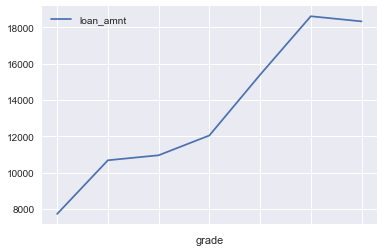

In [85]:
df_charged_off_grade.plot.line()

<center> <b> Figure 41 </b>, From all the charged off loan applicants, applicants with Grade F have taken more loan amount 

In [86]:
df_charged_off_sub_grade = df_charged_off.groupby('sub_grade').mean()[['loan_amnt']]
df_charged_off_sub_grade

,loan_amnt
sub_grade,
A1,7223.333333
A2,6781.418919
A3,7682.524272
A4,7788.150289
A5,8105.046948
B1,8788.554217
B2,9352.304147
B3,11045.245399
B4,11231.328125


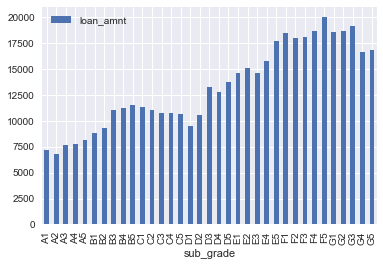

In [87]:
df_charged_off_sub_grade.plot.bar(stacked=True)


<center> <b> Figure 42 </b>, From all the charged off loan applicants, applicants with Sub Grade F5 have taken more loan amount 

In [88]:
df_charged_off_year = df_charged_off.groupby('Issue Year').mean()[['loan_amnt']]
df_charged_off_year

,loan_amnt
Issue Year,
07,10640.476190
08,10847.907950
09,10215.570175
10,10537.028631
11,12803.557845


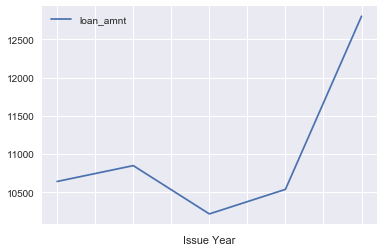

In [89]:
df_charged_off_year.plot.line()

<center> <b> Figure 43 </b>, From all the charged off loan applicants, loan amount is more in 2011 

In [90]:
df_charged_off_year_count = df_charged_off.groupby('Issue Year').count()['member_id']
#df_charged_off_year_count=pd.DataFrame(df_charged_off.groupby(by=['Issue Year'], as_index=False)['member_id'].count())

In [91]:
df_charged_off_year_count

Issue Year
07      42
08     239
09     570
10    1432
11    3155
Name: member_id, dtype: int64

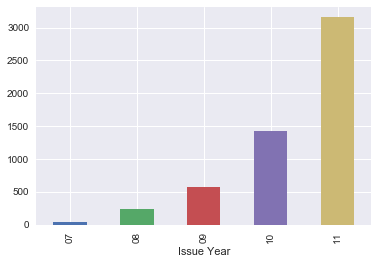

In [92]:
df_charged_off_year_count.plot.bar(stacked=True)

<center> <b> Figure 44 </b>, From all the charged off loan applicants, no. of applicamts is more in 2011 

In [93]:
df_charged_off_year_loan_amnt= df_charged_off_year.merge(df_charged_off_year_count.to_frame(), how='inner', on='Issue Year')
df_charged_off_year_loan_amnt

,loan_amnt,member_id
Issue Year,,
07,10640.476190,42
08,10847.907950,239
09,10215.570175,570
10,10537.028631,1432
11,12803.557845,3155


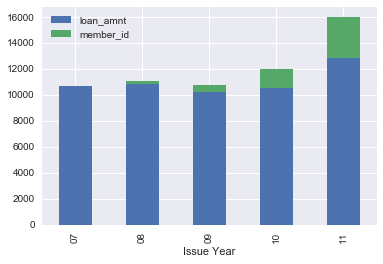

In [94]:
df_charged_off_year_loan_amnt.plot.bar(stacked=True)


<center> <b> Figure 45 </b>, From all the charged off loan applicants, no. of applicamts and loan amount is more in 2011
</center>

<center> <b><u>Observations after bivariate analysis</u></b></center>

1. The loans which are disbursed for 60 months tenure and for Educational purposes is most risky (from Figure 29), followed by Small Business, Renewable Energy
2. Borrower with less annual income and high interest rate & high installments are having a high risk of getting defaulted (Figure 37 and 38)
3. Borrowers with more than 7 years of experience are having more dti and thus having high risk of defaulting loan. For Charged off and Current Loans the risk is higher at experience level more than 9 years. For the Charfged Off cases only the risk is seen higher at 7 - 8 Years of experience.
4. When the loan amount is higher among the experienced people, there is a high chance of it getting defaulted/charged off (from figure 39 and 23)
5. Borrowers with high experience have higher dti (figure 36), which pose threat of the loan getting defaulted/charged off.
6. From the heat map and the correlation table we can see that there is a positive corelation (0.165116) between the total_rec_late_fee and loan_status, high frequency of late fees could also be an indication that the borrower can default or the loan will get charged off.

<Center><b>Bivariate Analysis | End<b>

<center> <b> Below are the reasons of the loans getting defaulted/charged off</b> </center>

1. Low Annual Income
2. High Loan amount
3. High Installment amount
4. More number of receiving late fees
5. High DTI
6. More Work Experience
7. Small Business and Education as purpose
8. High DTI
9. High interest rate


In [97]:
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,Experience,Interest Rate,Issue Year,Issue Month
0,1077501,1296599,5000,5000,4975,36,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,10.0,10.65,11,Dec
1,1077430,1314167,2500,2500,2500,60,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1.0,15.27,11,Dec
2,1077175,1313524,2400,2400,2400,36,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,10.0,15.96,11,Dec
3,1076863,1277178,10000,10000,10000,36,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,10.0,13.49,11,Dec
4,1075358,1311748,3000,3000,3000,60,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,1.0,12.69,11,Dec
